# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_labels.csv, test_inputs.csv, test_labels.csv) in the Colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [2]:
# from google.colab import files
# uploaded = files.upload()
# %ls

# Import libraries 
Do not use any other Python library.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_knn_data

This function loads the data for KNN from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels




  



In [4]:
def load_knn_data():
  test_inputs = np.genfromtxt('./data/testData.csv', delimiter=',')
  test_labels = np.genfromtxt('./data/testLabels.csv', delimiter=',')
  train_inputs = np.genfromtxt('./data/trainData1.csv', delimiter=',')
  train_labels = np.genfromtxt('./data/trainLabels1.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: predict_knn

This function uses the KNN classifier to predict the label of a data point.

Inputs:
*   **x**: input data point for which we want to predict the label (numpy array of M features)
*   **inputs**: matrix of data points in which neighbours will be found (numpy array of N data points x M features)
*   **labels**: vector of labels associated with the data points  (numpy array of N labels)
*   **k_neighbours**: # of nearest neighbours that will be used

Output:
*   **predicted_label**: predicted label (integer)




In [5]:
def euclideanDistance(x1, x2):
  return np.linalg.norm(x1 - x2)

def predict_knn(x, inputs, labels, k_neighbours):
  # compute the distances between all the data points
  distances = [euclideanDistance(x,x_train) for x_train in inputs]
  
  k_indices = np.argsort(distances)[k_neighbours]

  k_nearest_labels = [labels[i] for i in k_indices] 
  
  predicted_label = k_nearest_labels[0]
  return predicted_label

# Function: eval_knn

Function that evaluates the accuracy of the KNN classifier on a dataset.  The dataset to be evaluated consists of (inputs, labels).  The dataset used to find nearest neighbours consists of (train_inputs, train_labels).

Inputs:
*   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
*   **labels**: vector of target labels for the inputs (numpy array of N labels)
*   **train_inputs**: matrix of input data points in which neighbours will be found (numpy array of N' data points x M features)
*   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
*   **k_neighbours**: # of nearest neighbours to be used (integer)

Outputs:
*   **accuracy**: percentage of correctly labeled data points (float)




In [6]:
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
    n_correct = 0
    for i in range(len(inputs)):
        x = inputs[i]
        label = labels[i]
        predicted_label = predict_knn(
            x, train_inputs, train_labels, k_neighbours)
        if predicted_label == label:
            n_correct += 1

    accuracy = n_correct / len(inputs) * 100
    return accuracy

# Function: cross_validation_knn

This function performs k-fold cross validation to determine the best number of neighbours for KNN.

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)
*   **inputs**: matrix of data points to be used when searching for neighbours (numpy array of N data points by M features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best # of neighbours for KNN (integer)
*   **best_accuracy**: accuracy achieved with best_hyperparam (float)
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)





In [14]:
from models.KNN import KNN
k_to_accuracies = {}
k_to_average_accuracy = {}


def LoadDataset(i, N):
    flag = True  # turn false after we encounter the first training set
    for j in range(i, N):
        # construct training and validation set
        data = np.loadtxt('./data/trainData' + str(j) + '.csv',
                          delimiter=',', dtype='int')
        label = np.loadtxt('./data/trainLabels' + str(j) +
                           '.csv', delimiter=',', dtype='int')
        if i == j:
            validationData = data
            validationLabel = label
        elif flag:
            trainingData = data
            trainingLabel = label
            flag = False
        else:
            trainingData = np.concatenate((trainingData, data))
            trainingLabel = np.concatenate((trainingLabel, label))
    return trainingData, trainingLabel, validationData, validationLabel


def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
    for i in range(1, k_folds):
        trainingData, trainingLabel, validationData, validationLabel = LoadDataset(
            i, k_folds+1)        
        knn = KNN()
        knn.train(trainingData, trainingLabel)

        for k in hyperparameters:
            predict_labels = knn.predict(validationData, k=k)
            accuracy = np.mean(predict_labels == validationLabel)
            k_to_accuracies.setdefault(k, []).append(accuracy)
        
    for k in sorted(k_to_accuracies):
        sum_accuracy = 0
        for accuracy in k_to_accuracies[k]:
            sum_accuracy += accuracy
        average_accuracy = sum_accuracy / k_folds
        k_to_average_accuracy.setdefault(k, []).append(average_accuracy)
        # print('k = %d, average accuracy = %f' % (k, average_accuracy))
    
    print(k_to_accuracies)
    print(k_to_average_accuracy)
    # for i, (k, v) in enumerate(k_to_accuracies):
    #     print(v)
        # top_accuracies = np.max(v)
    
    # print(top_accuracies)
    accuracies = 0

    best_hyperparam = 0

    best_accuracy = 0


    return best_hyperparam, best_accuracy, accuracies

# Function: plot_knn_accuracies

Function that plots the KNN accuracies for different # of neighbours (hyperparameters) based on cross validation

Inputs:
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)


In [8]:
def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()  

# Main KNN code

Load data.
Use k-fold cross validation to find the best # of neighbours for KNN.
Plot accuracies for different # of neighbours.
Test KNN with the best # of neighbours.

{1: [0.45, 0.59, 0.5, 0.47, 0.48, 0.6, 0.49, 0.45, 0.47], 2: [0.45, 0.59, 0.5, 0.47, 0.48, 0.6, 0.49, 0.45, 0.47], 3: [0.44, 0.52, 0.47, 0.39, 0.48, 0.59, 0.49, 0.45, 0.45], 4: [0.43, 0.55, 0.5, 0.43, 0.49, 0.61, 0.48, 0.43, 0.49], 5: [0.47, 0.53, 0.48, 0.42, 0.48, 0.47, 0.55, 0.48, 0.47], 6: [0.44, 0.58, 0.46, 0.45, 0.48, 0.51, 0.53, 0.47, 0.45], 7: [0.39, 0.57, 0.47, 0.46, 0.48, 0.5, 0.59, 0.45, 0.54], 8: [0.4, 0.56, 0.5, 0.46, 0.45, 0.55, 0.52, 0.49, 0.53], 9: [0.43, 0.53, 0.49, 0.42, 0.45, 0.51, 0.56, 0.51, 0.57], 10: [0.46, 0.57, 0.49, 0.42, 0.45, 0.54, 0.58, 0.51, 0.54], 11: [0.47, 0.52, 0.5, 0.44, 0.42, 0.43, 0.56, 0.52, 0.46], 12: [0.48, 0.55, 0.5, 0.44, 0.4, 0.48, 0.55, 0.49, 0.47], 13: [0.43, 0.52, 0.52, 0.47, 0.39, 0.44, 0.55, 0.51, 0.45], 14: [0.45, 0.5, 0.51, 0.46, 0.42, 0.46, 0.54, 0.48, 0.45], 15: [0.44, 0.47, 0.49, 0.48, 0.41, 0.44, 0.56, 0.52, 0.44], 16: [0.45, 0.52, 0.46, 0.41, 0.39, 0.53, 0.54, 0.48, 0.4], 17: [0.47, 0.53, 0.47, 0.44, 0.37, 0.46, 0.54, 0.5, 0.4], 18:

ValueError: x and y must have same first dimension, but have shapes (19,) and (1,)

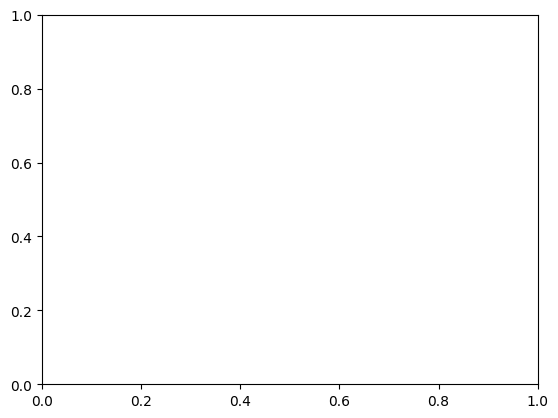

In [15]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 10
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels);

# plot results
# plot_knn_accuracies(accuracies, hyperparams)
# print('best # of neighbours k: ' + str(best_k_neighbours))
# print('best cross validation accuracy: ' + str(best_accuracy))

# # evaluate with best # of neighbours
# accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbours)
# print('test accuracy: '+ str(accuracy))